In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown, Latex
# import plotly.express as px
# import plotly.offline as pyo
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# import warnings
# warnings.filterwarnings('ignore')

## Library for more complex plots
# import plotly.figure_factory as ff

## For subplots
# from plotly import subplots 

# import cufflinks as cf
# cf.go_offline()
%matplotlib inline

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
    
}
div.output_subarea{
    max-width:1200px;
}
div.text_cell_render{
padding: 5em 5em 0.5em 0.5em
}

</style>
"""))

# Forest Cover type dataset

### The parameters are below

- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points

#### All the parameters below have been one-hot-encoded
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation


#### The cover types are as follows
    1 - Spruce/Fir
    2 - Lodgepole Pine
    3 - Ponderosa Pine
    4 - Cottonwood/Willow
    5 - Aspen
    6 - Douglas-fir
    7 - Krummholz


### In the dataset the response column Cover Type (54) ranges from 0 to 7, so this is a classification problem.

In [2]:
df = pd.read_csv('covtype.data', header=None)

### Columns 10 to 54 are actually one-hot-encoded. So, they are not seperate features but rather one categorical feature split up for ML applications.

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


### Below are some general summary stats for the continuos features in the dataset. Note, that there are nearly 600k observations in the dataset.

In [4]:
df.iloc[:,:5].describe()

,0,1,2,3,4
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855
std,279.984734,111.913721,7.488242,212.549356,58.295232
min,1859.000000,0.000000,0.000000,0.000000,-173.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000


### None of the columns contain any missing values

In [13]:
df.isna().sum().to_frame().transpose()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### The data is highly skewed. Most of the Cover Types are either type 1 or 2 (Spruce/Fir or Lodgepole Pine)

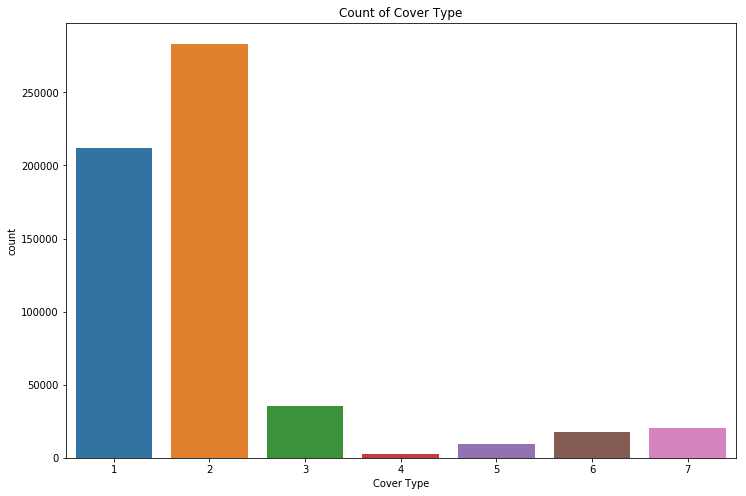

In [88]:
# df.groupby(by=54)[0].count().iplot(kind='bar',
#                                   title='Count of Cover Type',
#                                   yTitle='Type of Cover')

plt.figure(figsize=[12,8])
sns.countplot(x=54, data=df)
plt.xlabel('Cover Type')
plt.title('Count of Cover Type')
plt.show()

### Correlation among continuous features (columns 0 to 9)
The heatmap below is to determine if there are any features that are highly correlated with each other. Multicollinearity isn't typically an issue for prediction since we are not making causal inferences, however reducing parameters can help build a more parsimonious model.

In this case, feature 6 and 8 (Hill shade features) are highly correlated with each other.

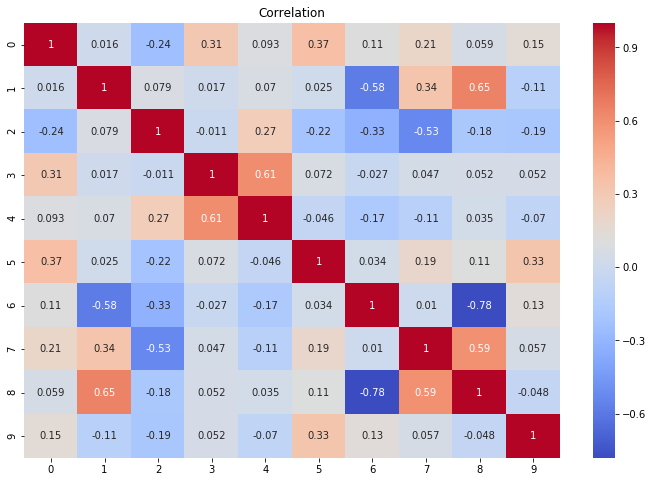

In [79]:
plt.figure(figsize=[12,8])
sns.heatmap(df.iloc[:,:10].corr(), cmap='coolwarm', annot=True).set_title("Correlation")
plt.show()

### The plot below clearly shows that Elevation has an effect on Cover Type

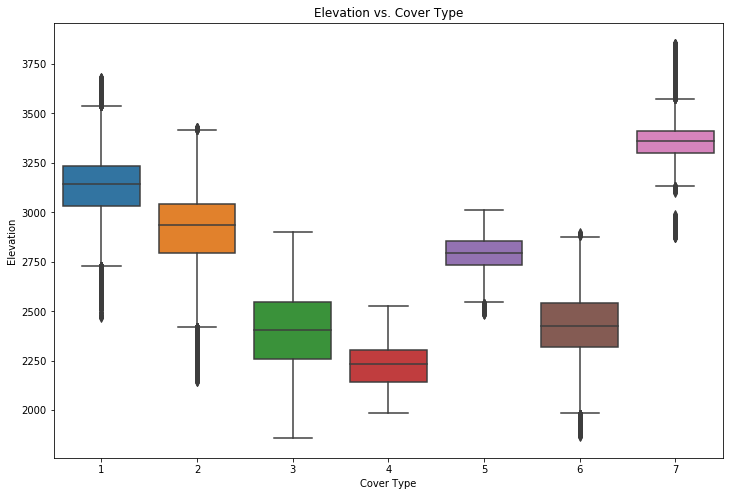

In [84]:
# df.pivot_table(index=df.index, values=0, columns=54).iplot(kind='box',
#                                                           title='Elevation vs. Cover Type',
#                                                           xTitle='Cover Type',
#                                                           yTitle='Elevation')
plt.figure(figsize=[12,8])
sns.boxplot(x=54, y=0, data=df)
plt.xlabel('Cover Type')
plt.ylabel('Elevation')
plt.title('Elevation vs. Cover Type')
plt.show()

### It is difficult to claim if slope has an effect on Cover Type

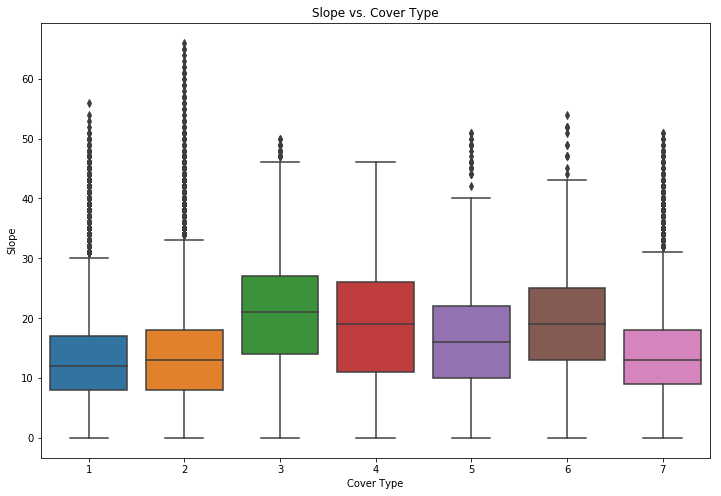

In [85]:
# df.pivot_table(index=df.index, values=2, columns=54).iplot(kind='box',
#                                                           title='Slope vs. Cover Type',
#                                                           xTitle='Cover Type',
#                                                           yTitle='Slope')

plt.figure(figsize=[12,8])
sns.boxplot(x=54, y=2, data=df)
plt.xlabel('Cover Type')
plt.ylabel('Slope')
plt.title('Slope vs. Cover Type')
plt.show()

### It is also difficult to determine if distance to water has an effect on Cover Type

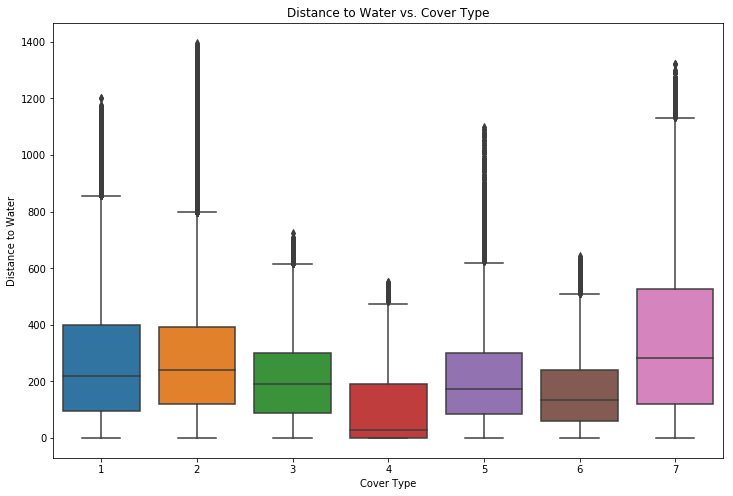

In [86]:
# df.pivot_table(index=df.index, values=3, columns=54).iplot(kind='box',
#                                                           title='Distance to Water vs. Cover Type',
#                                                           xTitle='Cover Type',
#                                                           yTitle='Distance to Water')

plt.figure(figsize=[12,8])
sns.boxplot(x=54, y=3, data=df)
plt.xlabel('Cover Type')
plt.ylabel('Distance to Water')
plt.title('Distance to Water vs. Cover Type')
plt.show()

In [59]:
# df.pivot_table(index=df.index, values=6, columns=54).iplot(kind='box',
#                                                           title='Distance to roads vs. Cover Type',
#                                                           xTitle='Cover Type',
#                                                           yTitle='Distance to roads')

# Model

### I split the data into a 70-30 training-test set

In [60]:
X = df.drop(54, axis=1).values
y = df[54].values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

### Scaling data
Scaling is not required for RFCs, however I will go ahead and perform the operation in case I have to move onto KNN or neural nets.

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [64]:
scaler = MinMaxScaler()

In [65]:
scaler.fit(X_train)

/Users/Sanjeed/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



MinMaxScaler(copy=True, feature_range=(0, 1))

In [66]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest Classifier
The RFC model is doing quite well on the validation set as can be seen from the F1-scores. The F1-score is just a representation of the trade-off between precision and recall. Unlike simple accuracy, F1-score is a bit tougher to improve and therefore can help avoid over-fitting. Also, note that we had the least amount of data for Cover Type 4 (Cottonwood/Willow) and the model does do the worst there. However, it is still performing better than expected. The overall accuracy is about 95 percent.

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, verbose=1)
rfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.4s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=1, warm_start=False)

In [68]:
rfc_pred = rfc.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished


In [69]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63556
           2       0.95      0.97      0.96     85078
           3       0.94      0.96      0.95     10638
           4       0.91      0.85      0.88       795
           5       0.94      0.75      0.84      2941
           6       0.93      0.89      0.91      5227
           7       0.97      0.95      0.96      6069

   micro avg       0.95      0.95      0.95    174304
   macro avg       0.94      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304



In [70]:
from sklearn.metrics import accuracy_score

print(f'''
The Random Forest Classifier model has an accuracy of about
{round(accuracy_score(y_test, rfc_pred),3)}
''')


The Random Forest Classifier model has an accuracy of about
0.952



### Hyper parameter tuning
In order to keep compute times low I am trying out just a few parameters to see if the model can be improved. 

In [25]:
random_grid = {'n_estimators': [50, 100, 200],
               'max_depth': [10,15],
               }
random_grid

{'n_estimators': [50, 100, 200], 'max_depth': [10, 15]}

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rfc = RandomForestClassifier()
rfc_grid = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=100,
                             cv=3, verbose=2, random_state=42, n_jobs=-1)
rfc_grid.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [ ]:
rfc_grid.best_params_

### Oddly enough, the model with the best parameters is performing worse on the validation set. So, clearly I am over-fitting on the training set and it is better to just stick with the defaults. 

The accuracy has fallen to only 82.6% on the validation set

In [71]:
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42, verbose=1,
                            max_depth=15)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   41.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    1.1s finished


              precision    recall  f1-score   support

           1       0.83      0.78      0.81     63556
           2       0.81      0.89      0.85     85078
           3       0.86      0.90      0.88     10638
           4       0.91      0.75      0.82       795
           5       0.94      0.18      0.31      2941
           6       0.91      0.59      0.72      5227
           7       0.97      0.76      0.85      6069

   micro avg       0.83      0.83      0.83    174304
   macro avg       0.89      0.69      0.75    174304
weighted avg       0.83      0.83      0.82    174304



In [73]:
print(f'''
The optimized Random Forest Classifier model has an accuracy of about
{round(accuracy_score(y_test, rfc_pred),3)}
''')


The optimized Random Forest Classifier model has an accuracy of about
0.826



# Simplification

The RFC model worked so well that I strongly suspect a more parsimonious model is possible. So, I reduced the dataset by dropping all the categorical variables. I also dropped one of the Hill shade features, since it was highly correlated with the other Hill shade feature. Now, the dataframe only has nine continous parameters.

### The model of choice is a simple Decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
X = df.iloc[:,:10].drop(6, axis=1)
y = df[54]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [44]:
dtree = DecisionTreeClassifier(random_state=42)

In [45]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [46]:
tree_preds = dtree.predict(X_test)

### Surprisingly, the Decision tree, without any hyper parameter optimization is performing about the same as the RFC. The accuracy for this far simpler model is about 91.3%, which is only about 4% worse than the RFC. The F1-scores are also comparable to the RFC. 

In [47]:
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

           1       0.91      0.92      0.91     63556
           2       0.93      0.93      0.93     85078
           3       0.89      0.89      0.89     10638
           4       0.81      0.79      0.80       795
           5       0.78      0.76      0.77      2941
           6       0.82      0.82      0.82      5227
           7       0.91      0.92      0.92      6069

   micro avg       0.91      0.91      0.91    174304
   macro avg       0.86      0.86      0.86    174304
weighted avg       0.91      0.91      0.91    174304



In [48]:
print(f'''
The Decision Classifier model has an accuracy of about
{round(accuracy_score(y_test, tree_preds),3)}
''')


The Decision Classifier model has an accuracy of about
0.913



# Conclusion
The RFC model performs quite well and it did not require much effort to build. The size of the dataset did make things difficult. Visualizations took a while to compute and I also deleted some plots that were too messy to be interpretable. The fact that the dataset was already one-hot-encoded and did not contain any missing values also made things simpler.

It is also clear that only nine of the 53 features are neccesary to build a simple Decision tree model that is capable of 91.3% accuracy. In fact, the simpler model is only about 4% worse than the more complex RFC. It is possible that the dataset could be reduced even more without significant loss in performance.